In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import DistanceMetric

In [2]:
df = pd.read_csv('heart.csv')

<AxesSubplot:>

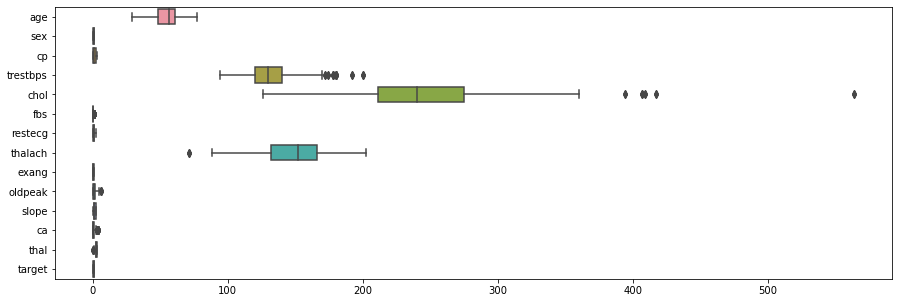

In [3]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [4]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["chol"] < upper_limit]

In [5]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["trestbps"] < upper_limit]

In [6]:
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df=df[df["thalach"] > lower_limit]

In [7]:
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
df=df[df["oldpeak"] < oldpeak_upper_limit]

<AxesSubplot:>

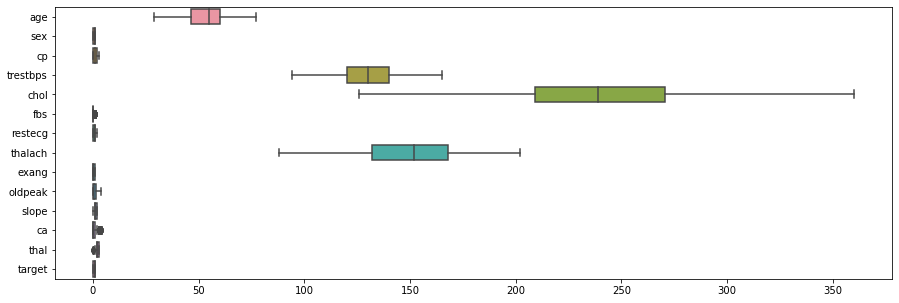

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [9]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN #K-Nearest Neighbors
my_KNN_model = KNN(n_neighbors = 3)

In [12]:
my_KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_hat_KNN = my_KNN_model.predict(x_test)

In [14]:
total_squared_error_KNN = (np.sum((y_test - y_hat_KNN)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error_KNN = total_squared_error_KNN/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error_KNN)

0.026455026455026454


In [15]:
recall_score(y_test,y_hat_KNN)

0.9814814814814815

<AxesSubplot:>

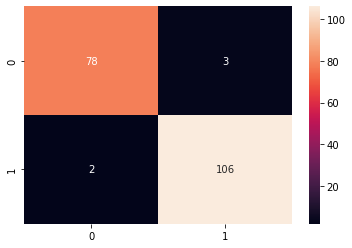

In [16]:
sns.heatmap(confusion_matrix(y_test, y_hat_KNN), annot=True, fmt='g')

**Metrics:**

Precision: 0.9629629629629629 |
Recall: 0.975 |
F1: 0.9689440993788819 |
Accuracy: 97.35449735449735% |
MSE: 0.026455026455026454



In [17]:
recall_score(y_test, y_hat_KNN_2)

NameError: name 'y_hat_KNN_2' is not defined

In [18]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15], 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'p':[1, 2, 3, 4, 5], 'metric': ('minkowski', 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis') }

In [19]:
clf = GridSearchCV(my_KNN_model, parameters, scoring = 'recall')

In [20]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'metric': ('minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'wminkowski', 'seuclidean',
                                    'mahalanobis'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [21]:
clf.best_score_

0.9974683544303797

In [22]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=3)

In [23]:
clf.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 3,
 'weights': 'uniform'}

In [24]:
clf.cv_results_

In [25]:
KNN_model_2 = KNN(n_neighbors = 7, weights = 'distance')
KNN_model_2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [26]:
y_hat_KNN_2 = KNN_model_2.predict(x_test)

<AxesSubplot:>

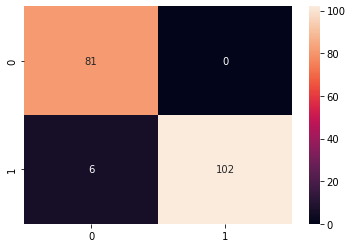

In [27]:
sns.heatmap(confusion_matrix(y_test, y_hat_KNN_2), annot=True, fmt='g')

In [28]:
print(81 / (81 + 6))

0.9310344827586207


In [29]:
KNN_model_3 = KNN(n_neighbors = 1, p = 3)
KNN_model_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=3)

In [30]:
y_hat_KNN_3 = KNN_model_3.predict(x_test)

<AxesSubplot:>

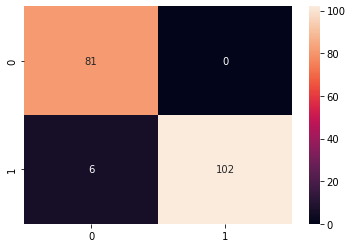

In [31]:
sns.heatmap(confusion_matrix(y_test, y_hat_KNN_3), annot=True, fmt='g')

In [32]:
from sklearn import neighbors

In [33]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=7, weights = 'distance')

In [34]:
clf0 = GridSearchCV(clf1, parameters, scoring = 'recall')

In [35]:
clf0.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'metric': ('minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'wminkowski', 'seuclidean',
                                    'mahalanobis'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [36]:
clf0.best_score_

0.9974683544303797

In [37]:
clf0.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 3,
 'weights': 'uniform'}

In [38]:
clf0.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=3)

In [39]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [40]:
KNN_2 = KNN(n_neighbors = 1, weights = 'uniform', p =3 )



In [41]:
KNN_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=3)

In [42]:
KNN_2hat = KNN_2.predict(x_test)
KNN_2hat

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [43]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

<AxesSubplot:>

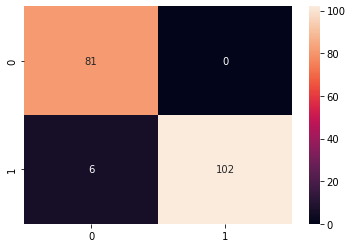

In [44]:
sns.heatmap(confusion_matrix(y_test, KNN_2hat),annot=True, fmt='g')

In [45]:
#accuracy

accuracyKNN_2 = (81 + 102)/(81+102+0+6)
accuracyKNN_2

0.9682539682539683

In [46]:
recall_score(y_test,KNN_2hat)

0.9444444444444444

In [47]:
print(clf1)

KNeighborsClassifier(n_neighbors=7, weights='distance')


In [48]:
KNN_hat = clf.predict(x_test)
KNN_hat

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [49]:
recall_score(#correct values ,#pred values)

SyntaxError: unexpected EOF while parsing (3941551578.py, line 1)

In [50]:
recall_score(y_test, y_hat_KNN_3)

0.9444444444444444

In [51]:
recall_score(y_test, y_hat_KNN)

0.9814814814814815

In [52]:
recall_score(y_test, KNN3_yhat)

NameError: name 'KNN3_yhat' is not defined

In [53]:
KNN_3 = KNN(n_neighbors = 3)

In [54]:
KNN_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
KNN3_yhat = KNN_3.predict(x_test)

In [56]:
recall_score(y_test, KNN3_yhat)

0.9814814814814815

## best model is default with n_neighbors = 3, recall for that model is .9814

## or n_neighbors = 7, weights = "distance"



In [57]:
KNN_4 = KNN(n_neighbors = 32)

In [59]:
KNN_4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [61]:
KNN4yhat = KNN_4.predict(x_test)

In [62]:
recall_score(y_test,KNN4yhat)

0.8703703703703703